In [1]:
import pandas as pd

In [2]:
input_df = pd.read_csv(r'website-traffic.csv')
input_df.head()

,DayOfWeek,MonthDay,Year,Visits
0,Monday,June 1,2009,27
1,Tuesday,June 2,2009,31
2,Wednesday,June 3,2009,38
3,Thursday,June 4,2009,38
4,Friday,June 5,2009,31


In [3]:
input_df.columns = input_df.columns.str.strip()

input_df['date_of_visit'] = pd.to_datetime(input_df.MonthDay.str.cat(input_df.Year.astype(str), sep=' '))
input_df[['date_of_visit','Visits']].head(10)

,date_of_visit,Visits
0,2009-06-01,27
1,2009-06-02,31
2,2009-06-03,38
3,2009-06-04,38
4,2009-06-05,31
5,2009-06-06,24
6,2009-06-07,21
7,2009-06-08,29
8,2009-06-09,30
9,2009-06-10,22


In [4]:
# Plot time series
import matplotlib.pyplot as plt
%matplotlib inline

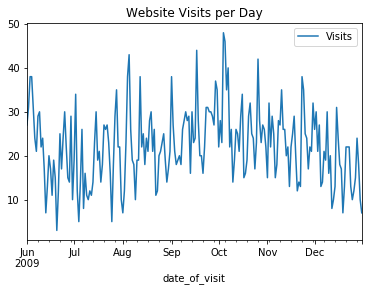

In [5]:
input_df.plot(x = 'date_of_visit', y = 'Visits', title = 'Website Visits per Day')

In [6]:
# Plot Time Series Constituents
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/chenyuwei/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


A time series is said to be comprised of the following three major components:
1. Seasonality
2. Trend
3. Residual

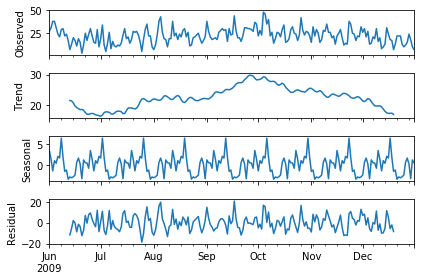

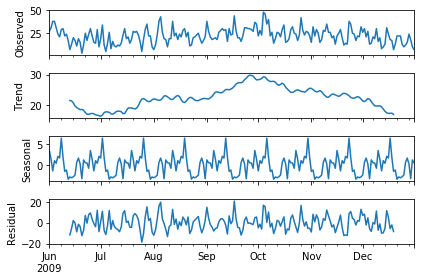

In [7]:
ts_visits = pd.Series(input_df.Visits.values, 
                      index = pd.date_range(input_df.date_of_visit.min(),
                                            input_df.date_of_visit.max(),
                                            freq = 'D'))

decompose = seasonal_decompose(ts_visits.interpolate(), freq = 24)
decompose.plot()

# Smoothing

## Moving average

   Visits  moving_average
0      27             NaN
1      31             NaN
2      38       32.000000
3      38       35.666667
4      31       35.666667
5      24       31.000000
6      21       25.333333
7      29       24.666667
8      30       26.666667
9      22       27.000000


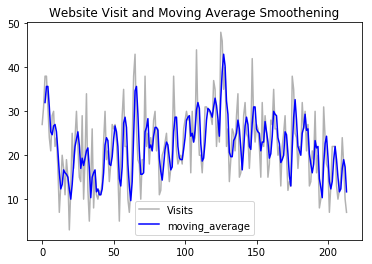

In [11]:

## a rolling windowed approach. 
input_df['moving_average'] = input_df['Visits'].rolling(window = 3, 
                                                        center = False).mean()

print(input_df[['Visits','moving_average']].head(10))

plt.plot(input_df.Visits, '-', color = 'black', alpha = 0.3)
plt.plot(input_df.moving_average, color = 'b')
plt.title('Website Visit and Moving Average Smoothening')
plt.legend()
plt.show()

## Exponential smoothing

Exponential smoothening methods give more weight to recent past observations as compared to older observations. 
It is also called exponentially weighted moving average (EWMA for short).